In [ ]:
%config IPCompleter.greedy=True
%autosave 10

import pandas as pd
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

iris_full = pd.read_csv('iris.csv', names=col_names)
iris_full.head()


In [2]:
# To check null values if any
iris_full.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [3]:
#Are all columns numerical?
iris_full.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [4]:
#Info function to look at data
iris_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
# Quantitative Exploration
iris_full.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#look at distribution of labels
iris_full['class'].value_counts(normalize=True)

Iris-virginica     0.333333
Iris-setosa        0.333333
Iris-versicolor    0.333333
Name: class, dtype: float64

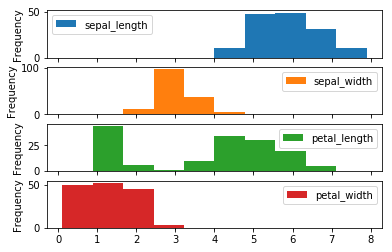

In [7]:
# Visual Exploration
import matplotlib.pyplot as plt
%matplotlib inline

#Plot histogram
iris_full.plot(kind='hist', layout=(4, 1), subplots=True);

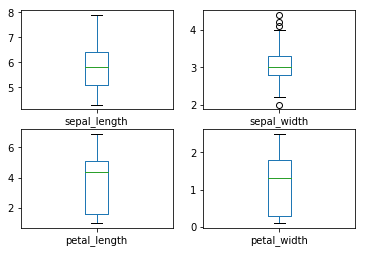

In [8]:
#Plot box plot
iris_full.plot(kind='box', layout=(2,2), subplots=True);

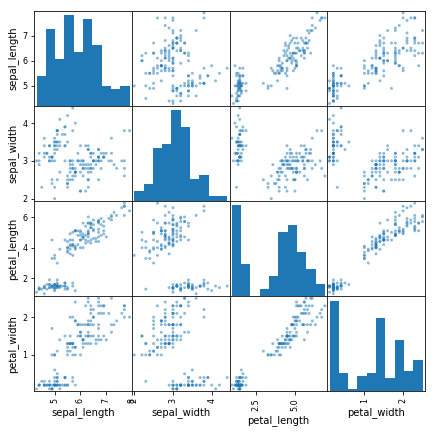

In [9]:
#Scatter Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(iris_full, figsize=(7,7));

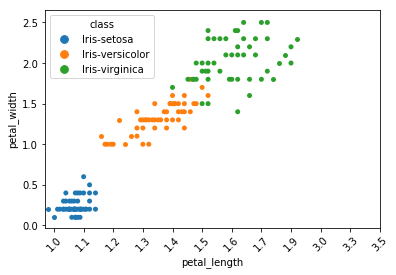

In [10]:
#Swarm Plot
import seaborn as sns

#Plot Petal length vs Petal Width
sns.swarmplot(x='petal_length', y='petal_width', hue='class', data=iris_full);
plt.xticks(range(1,60, 5), rotation=45);

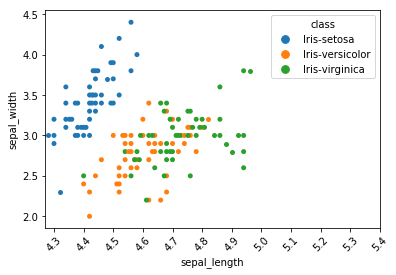

In [11]:
#Swarm Plot
import seaborn as sns

#Plot Petal length vs Petal Width
sns.swarmplot(x='sepal_length', y='sepal_width', hue='class', data=iris_full);
plt.xticks(range(1,60, 5), rotation=45);

In [12]:
# Prepare data for Machine Learning Algorithms
# Split into Train & Test Set
from sklearn import model_selection

#Get values from DataFrame - Sklearn wants numpy arrays
X = iris_full.values[ :, 0:4] #Select only feature columns
y = iris_full.values[ :, 4] #Select only class label

#Split into train (70%) and test (30%)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
y_test

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

In [13]:
# K-Nearest Neighbors
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#Initialize Model
knn_model = KNeighborsClassifier()
#Train & Test Model using Cross-Validation
cv_results = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy')
#Output CV Results
cv_results.mean()

0.9461904761904762

In [14]:
# Support Vector Classifier
from sklearn.svm import SVC

#Initialize Model
svm_model = SVC()
#Train & Test Model using Cross-Validation
cv_results = cross_val_score(svm_model, X_train, y_train, cv=10, scoring='accuracy')
#Output CV Results
cv_results.mean()

0.9550000000000001

In [15]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize Model
rf = RandomForestClassifier()
#Train & Test Model using Cross-Validation
cv_results = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
#Output CV Results
cv_results.mean()

/usr/lib64/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9395238095238095

In [16]:
#  Evaluate & Tune Model
from sklearn.model_selection import GridSearchCV

#Parameter dictionary for gridsearch
params = {'C': [.001, .01, .1, 1, 10, 100, 1000],
          'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}
#Initialize Model
svm_model = SVC()
#Initialize GridSearch
grid_cv = GridSearchCV(svm_model, params, cv=10)
#Fit GridSearch
grid_cv.fit(X_train, y_train)
#Get Best Results
print ("Best000 Score: {}, Best Parameters: {}".format(grid_cv.best_score_, grid_cv.best_params_)).........................................0.

Best Score: 0.9777777777777777, Best Parameters: {'C': 1, 'kernel': 'linear'}


In [17]:
# Verify on test set
from sklearn.metrics import accuracy_score

#Initialize Model
svm_model = SVC(kernel='linear', C=1)
#Fit Model
svm_model.fit(X_train, y_train)
#Make Predictions
predictions = svm_model.predict(X_test)
#Print score
accuracy_score(y_test, predictions)

1.0